# Обучим по новой предварительно модель и запишем основные метрики

In [1]:
from ultralytics import YOLO
from clearml import Task, Logger

In [ ]:
# сделаем отдельную таску под тюнинг
task = Task.init(
    project_name='zebra_test', 
    task_name='TuningYolo11', 
    tags=['yolo11, tuning args'])

ClearML Task: created new task id=a4723f24af77486ab688e79cf66baf08
ClearML results page: https://app.clear.ml/projects/45d33c510f314a938c8dc1ea8644e9d4/experiments/a4723f24af77486ab688e79cf66baf08/output/log


2025-06-23 22:32:07,085 - clearml.storage - INFO - Uploading: 91.41MB from C:/Users/836D~1/AppData/Local/Temp/yolo_dataset.lw5nd73g.zip


███████████████████████████████ 100% | 91.41/91.41 MB [02:51<00:00,  1.88s/MB]: 


In [3]:
# загрузим датасет
task.upload_artifact(name='data.raw', artifact_object="yolo_dataset")

True

In [4]:
model = YOLO("yolo11s.pt")

2025-06-23 22:31:54,555 - clearml.model - INFO - Selected model id: 85c7d8c9774b49e69ee1ee43e29a8aca


In [6]:
base_result = model.train(data='yolo_dataset\yolo_dataset.yaml',
            epochs=20,
            batch=-1,
            imgsz=640,
            cache=False,
            device=0,
            classes=[0,3], # отрежем людей и стол из обучения 
            workers=1,
)

<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Администратор\AppData\Local\Temp\ipykernel_10756\2612667712.py:1: SyntaxWarning: invalid escape sequence '\y'
  base_result = model.train(data='yolo_dataset\yolo_dataset.yaml',


Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[0, 3], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset\yolo_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3090) 24.00G total, 0.14G reserved, 0.11G allocated, 23.75G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9429340       21.55         0.835         38.02         239.7        (1, 3, 640, 640)                    list
     9429340       43.11         1.153         39.55         162.5        (2, 3, 640, 640)                    list
     9429340       86.22         1.776         50.73         153.6        (4, 3, 640, 640)                    list
     9429340       172.4         2.896          49.7         154.9        (8, 3, 640, 640)                    list
     9429340       344.9         5.002         90.24         162.9       (16, 3, 640, 640)                    list
     9429340       689.8         9.378         162.8         168.1       (32, 3, 640, 640)                    list
     9429340        1380        17.914         318.8         234.7       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 49 for CUDA:0 14.15G/24.00G (59%) 
train: Fast image

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 2831.4556.5 MB/s, size: 237.2 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0003828125), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20        15G      1.374      3.373      1.308       2437        640: 100%|██████████| 6/6 [00:07<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         87       2437     0.0352      0.302     0.0317     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20        14G      1.131      1.823      1.148       3005        640: 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         87       2437      0.521      0.687      0.513      0.345


2025-06-23 22:06:13,395 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20        14G     0.9335     0.8592      1.024       3190        640: 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         87       2437      0.587        0.6      0.552      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.9G     0.8525     0.7059     0.9819       2694        640: 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         87       2437      0.612      0.559      0.544      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      16.2G     0.8057     0.6615      0.962       2327        640: 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         87       2437      0.535      0.654      0.586       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      15.1G     0.7581     0.6079     0.9346       2516        640: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         87       2437      0.485      0.616      0.564      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      16.2G      0.744     0.5852     0.9245       3000        640: 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         87       2437       0.52      0.614      0.556      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20        14G     0.7142     0.5575      0.914       3190        640: 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         87       2437      0.517       0.57      0.577      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.9G     0.6846     0.5377     0.9075       2458        640: 100%|██████████| 6/6 [01:49<00:00, 18.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         87       2437      0.686      0.531       0.61      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      16.9G     0.6923     0.5364     0.9086       2456        640: 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         87       2437      0.664      0.563       0.61      0.412


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.3G     0.6814     0.5714     0.9044       1425        640: 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         87       2437      0.625      0.716      0.624      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20        12G     0.6317      0.514     0.8933       1543        640: 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         87       2437      0.621      0.694      0.616      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20        12G     0.6181     0.4944     0.8812       1561        640: 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         87       2437      0.528      0.688      0.557      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20        12G     0.6009     0.4825     0.8785       1486        640: 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         87       2437      0.653      0.747      0.627        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20        12G      0.575     0.4634      0.871       1440        640: 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         87       2437        0.6      0.749      0.579      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20        12G     0.5745      0.458     0.8701       1413        640: 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         87       2437       0.62      0.737      0.616      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20        12G     0.5576      0.449     0.8664       1522        640: 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         87       2437      0.644      0.744      0.624      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20        12G     0.5416     0.4386     0.8609       1602        640: 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         87       2437      0.681       0.74      0.648      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20        12G     0.5265     0.4275     0.8607       1623        640: 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         87       2437      0.686      0.735      0.633      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20        12G     0.5128     0.4204     0.8538       1494        640: 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         87       2437      0.665      0.723      0.641      0.435



20 epochs completed in 0.101 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 19.2MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


                   all         87       2437      0.665      0.725      0.641      0.436
                  food         87       1121      0.351      0.654      0.434      0.252
                dishes         87       1316       0.98      0.795      0.847      0.619
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train9
2025-06-23 22:12:19,070 - clearml.storage - INFO - Starting upload: runs\detect\train9\weights\best.pt => https://files.clear.ml/zebra_test/TuningYolo11.58a46e1b7e944fcdae03478c2fc5e72d/models/best.pt


2025-06-23 22:12:29,135 - clearml.storage - INFO - Uploading: 18.26MB from runs\detect\train9\weights\best.pt


███████████████████████████████ 100% | 18.26/18.26 MB [00:26<00:00,  1.45s/MB]: 

2025-06-23 22:12:55,563 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/zebra_test/TuningYolo11.58a46e1b7e944fcdae03478c2fc5e72d/models/best.pt


# Большие ошибки могут быть связаны с плохой валидационной выборкой

In [18]:
# запишем основные метрики 
print("Базовая модель с базовыми параметрами без подбора гиперпараметров на 10 эпохах")
print(f"Precision {base_result.box.p}")
print(f"Recall {base_result.box.r}")
print(f"map50 {base_result.box.map50}")
print(f"map50-95 {base_result.box.map}")

Базовая модель с базовыми параметрами без подбора гиперпараметров на 10 эпохах
Precision [     0.3511     0.97974]
Recall [     0.6545     0.79483]
map50 0.6405610499981185
map50-95 0.4355641003013381


# Запустим обучение обучение на полную, посмотрим, чего получится добится 

In [5]:
full_run_base_model = YOLO(r"runs\detect\train9\weights\best.pt")# будем дообучать 

In [6]:


full_run_base_result = model.train(data=r'yolo_dataset\yolo_dataset.yaml', 
            epochs=100, 
            batch=24,
            imgsz=640,
            cache=False,
            device=0,
            classes=[0,3], # отрежем людей и стол из обучения 
            workers=1,
            patience=10,
)

Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[0, 3], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset\yolo_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 2052.31077.1 MB/s, size: 235.7 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005625000000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.43G      1.235      2.482      1.216       1222        640: 100%|██████████| 12/12 [00:08<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         87       2437      0.579       0.66      0.612      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.44G      0.916     0.8174      1.013       1576        640: 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         87       2437      0.699       0.59      0.596      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.46G     0.8395     0.6814     0.9724       1265        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         87       2437      0.683      0.576      0.599      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       7.5G     0.7982     0.6326     0.9536       1661        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         87       2437      0.706      0.572       0.63      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.08G     0.7501     0.5968     0.9368       1238        640: 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         87       2437      0.582      0.673      0.658      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.08G     0.7477     0.5834     0.9295       1175        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         87       2437      0.785      0.554      0.643      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.12G     0.7462     0.5736     0.9172       1596        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         87       2437      0.631      0.691      0.637      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.12G     0.7322      0.556     0.9184       1613        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         87       2437      0.631      0.682      0.611      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.12G     0.7143      0.531     0.9122       1067        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         87       2437      0.672      0.639      0.656      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.12G     0.7056     0.5263     0.9122       1229        640: 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         87       2437      0.725       0.67      0.695      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.12G     0.6786     0.5086     0.9029       1451        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         87       2437      0.783      0.648      0.707      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.12G     0.6508     0.4923     0.8984       1401        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         87       2437      0.821      0.603      0.691      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.12G     0.6478     0.4925     0.8897       1285        640: 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         87       2437      0.795      0.615       0.67      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.12G     0.6454     0.4868     0.8902       1672        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         87       2437       0.71      0.748      0.686      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.12G     0.6234      0.476     0.8899       1603        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         87       2437      0.858       0.61      0.713      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.12G     0.6116     0.4712     0.8813       1490        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         87       2437      0.761      0.698      0.714      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.12G     0.6004     0.4614     0.8809       1398        640: 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         87       2437      0.757      0.727      0.721      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.12G     0.5939     0.4568     0.8788       1426        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         87       2437      0.741      0.734      0.699      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.12G     0.5865     0.4525     0.8763       1601        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         87       2437       0.74      0.748      0.697      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.12G     0.5863     0.4562     0.8753       1184        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         87       2437      0.766      0.728      0.695      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.12G     0.5784     0.4528     0.8766       1662        640: 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         87       2437      0.713      0.718       0.68      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.12G     0.5688     0.4435     0.8683       1485        640: 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         87       2437      0.732       0.71       0.66      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.16G     0.5729     0.4411     0.8639       1472        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         87       2437      0.767      0.721        0.7      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.74G     0.5648     0.4414     0.8711       1205        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         87       2437      0.792      0.716      0.726      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.74G     0.5537     0.4359     0.8667       1286        640: 100%|██████████| 12/12 [00:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         87       2437      0.781      0.715      0.715      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.74G     0.5513      0.434     0.8726       1304        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         87       2437       0.75      0.694      0.689      0.456
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 16, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



26 epochs completed in 0.052 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 19.2MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


                   all         87       2437      0.761        0.7      0.714      0.482
                  food         87       1121      0.547      0.588      0.559      0.301
                dishes         87       1316      0.976      0.812      0.869      0.664
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\train10
2025-06-23 22:36:01,477 - clearml.storage - INFO - Starting upload: runs\detect\train10\weights\best.pt => https://files.clear.ml/zebra_test/TuningYolo11.a4723f24af77486ab688e79cf66baf08/models/best.pt


2025-06-23 22:36:11,540 - clearml.storage - INFO - Uploading: 18.27MB from runs\detect\train10\weights\best.pt


███████████████████████████████ 100% | 18.27/18.27 MB [00:27<00:00,  1.51s/MB]: 

2025-06-23 22:36:39,183 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/zebra_test/TuningYolo11.a4723f24af77486ab688e79cf66baf08/models/best.pt


# Запишем результаты этой модели 

In [7]:
# запишем основные метрики 
print("Базовая модель с базовыми параметрами без подбора гиперпараметров на 10 эпохах")
print(f"Precision {full_run_base_result.box.p}")
print(f"Recall {full_run_base_result.box.r}")
print(f"map50 {full_run_base_result.box.map50}")
print(f"map50-95 {full_run_base_result.box.map}")

Базовая модель с базовыми параметрами без подбора гиперпараметров на 10 эпохах
Precision [    0.54729     0.97555]
Recall [    0.58787     0.81155]
map50 0.7136643233182369
map50-95 0.4821291943138696


# Исходя из метрик плохо видит еду, а посуду очень хорошо, попробуем без использования нового датасета добить метрики для еды

In [1]:
# для начала будем использовать аргументы с последнего рана
# и последнюю модель для tuna 
# запускать будем по 10 эпох
# 2 итерации
from ultralytics import YOLO

full_run_base_model = YOLO(r"runs\detect\train10\weights\best.pt")


results = full_run_base_model.tune(
        data="yolo_dataset\yolo_dataset.yaml",
        epochs=10,
        iterations=2,
        plots=False,
        save=False,
        val=False,
        resume="args.yaml",
    )


<>:11: SyntaxWarning: invalid escape sequence '\y'
<>:11: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Администратор\AppData\Local\Temp\ipykernel_19948\4231311681.py:11: SyntaxWarning: invalid escape sequence '\y'
  data="yolo_dataset\yolo_dataset.yaml",


Tuner: Initialized Tuner instance with 'tune_dir=runs\detect\tune'
Tuner:  Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/2 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'cutmix': 0.0, 'copy_paste': 0.0}
Saved runs\detect\tune\tune_scatter_plots.png
Saved runs\detect\tune\tune_fitness.png

Tuner: 1/2 iterations complete  (149.27s)
Tuner: Results saved to runs\detect\tune
Tuner: Best fitness=0.56273 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.76684, 'metrics/recall(B)': 0.78413, 'metrics/mAP50(B)': 0.76985, 'metrics/mAP50-95(B)': 0.53972, 'val/box_loss': 0.98802, 'val/c

Метрика никак не улучшилась, по хорошему надо запускать на большем количестве итераций. 

Из того, что может улучшить результат - добавление аугментации, все предыдущие разы тренировки были без аугментации, в этот раз они появятся, по идее должно дать улучшение.

In [2]:
model_with_hyp_optimize = YOLO(r"runs\detect\tune\weights\best.pt")

In [3]:
import yaml
cfg = r'runs\detect\tune\best_hyperparameters.yaml'
with open(cfg, "r") as stream:
    try:
        cfg_args = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [7]:
cfg_args

{'lr0': 0.01,
 'lrf': 0.01018,
 'momentum': 0.937,
 'weight_decay': 0.00046,
 'warmup_epochs': 3.0,
 'warmup_momentum': 0.73239,
 'box': 7.73702,
 'cls': 0.50016,
 'dfl': 1.6308,
 'hsv_h': 0.01362,
 'hsv_s': 0.7,
 'hsv_v': 0.43294,
 'degrees': 0.0,
 'translate': 0.09733,
 'scale': 0.45476,
 'shear': 0.0,
 'perspective': 0.0,
 'flipud': 0.0,
 'fliplr': 0.48283,
 'bgr': 0.0,
 'mosaic': 1.0,
 'mixup': 0.0,
 'cutmix': 0.0,
 'copy_paste': 0.0}

<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Администратор\AppData\Local\Temp\ipykernel_19948\3576238308.py:1: SyntaxWarning: invalid escape sequence '\y'
  model_with_hyp_optimize.train(data="yolo_dataset\yolo_dataset.yaml",


Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.73702, cache=False, cfg=None, classes=[0, 3], close_mosaic=10, cls=0.50016, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset\yolo_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.6308, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.48283, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01362, hsv_s=0.7, hsv_v=0.43294, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01018, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs\detect\tune\weights\best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train15, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 2761.5902.9 MB/s, size: 239.9 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005175000000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train15
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       7.4G     0.5701     0.4848     0.9526       1226        640: 100%|██████████| 12/12 [00:08<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         87       2437      0.771      0.665      0.707      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.42G     0.5586     0.4375     0.9412       1534        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         87       2437      0.758      0.713        0.7      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.46G     0.5651     0.4344     0.9459       1249        640: 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         87       2437      0.762      0.734      0.684      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.46G     0.5707     0.4368     0.9451       1631        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         87       2437      0.722      0.758      0.713      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.46G     0.5781     0.4378     0.9459       1197        640: 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         87       2437      0.787       0.72      0.723      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.47G     0.5829     0.4383     0.9464       1154        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         87       2437      0.763      0.724        0.7      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.07G     0.6013     0.4392     0.9412       1549        640: 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         87       2437      0.742       0.69      0.724       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.07G     0.5893     0.4468     0.9419       1573        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         87       2437      0.725      0.732      0.716      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.09G     0.5821     0.4421     0.9435       1062        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         87       2437      0.763      0.691      0.713       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.09G     0.5787     0.4494      0.947       1203        640: 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         87       2437      0.726      0.744      0.719      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.09G     0.5937     0.4465     0.9451       1422        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         87       2437      0.824      0.682      0.735      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.09G     0.5929     0.4407     0.9428       1369        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         87       2437      0.688      0.735      0.689      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.09G     0.5935     0.4392     0.9424       1246        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         87       2437      0.768      0.608      0.688      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.09G     0.5664     0.4277     0.9398       1653        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         87       2437      0.813      0.641      0.712       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.09G      0.552     0.4204     0.9381       1561        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         87       2437      0.772       0.71      0.736      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.09G     0.5605     0.4217     0.9375       1482        640: 100%|██████████| 12/12 [00:05<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         87       2437      0.775      0.685      0.714      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.09G     0.5447     0.4176     0.9352       1362        640: 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         87       2437      0.776      0.685      0.714      0.474
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 7, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



17 epochs completed in 0.033 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 19.2MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]


                   all         87       2437      0.741       0.69      0.724       0.49
                  food         87       1121      0.487      0.589      0.594      0.325
                dishes         87       1316      0.995      0.792      0.854      0.654
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train15


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000012808B6E410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

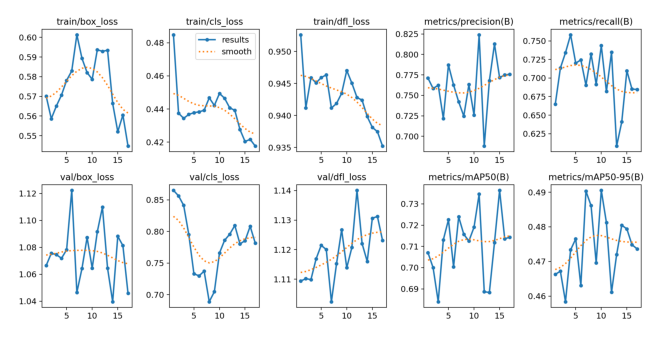

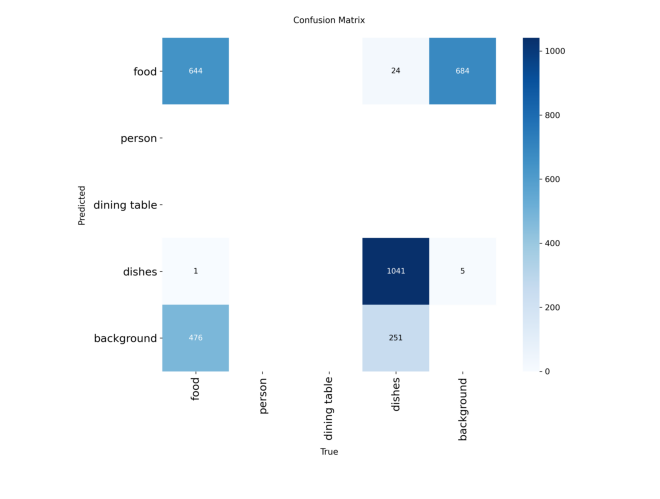

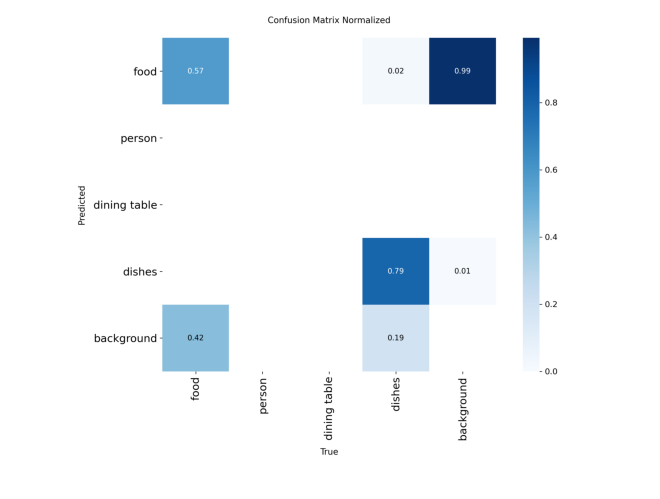

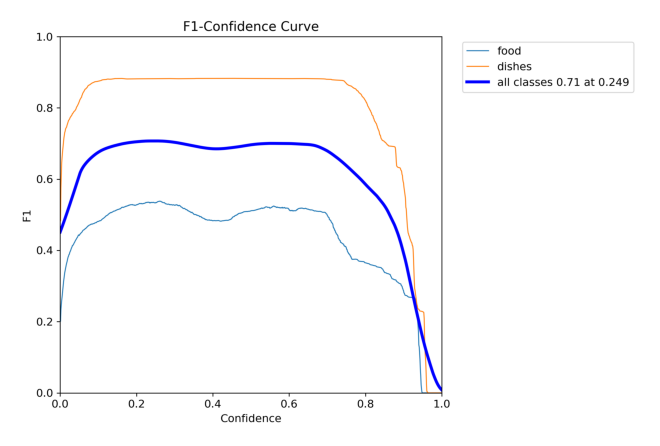

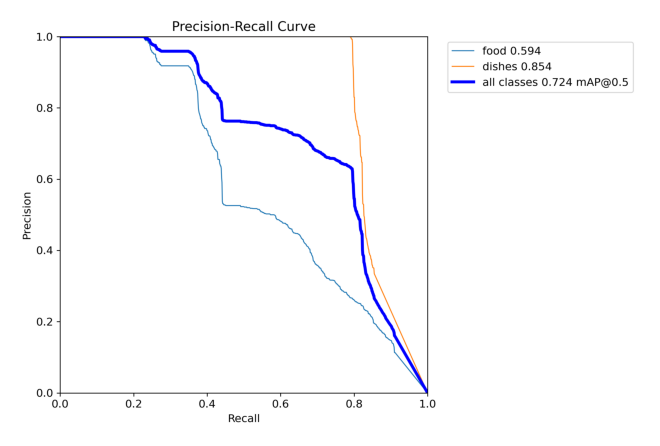

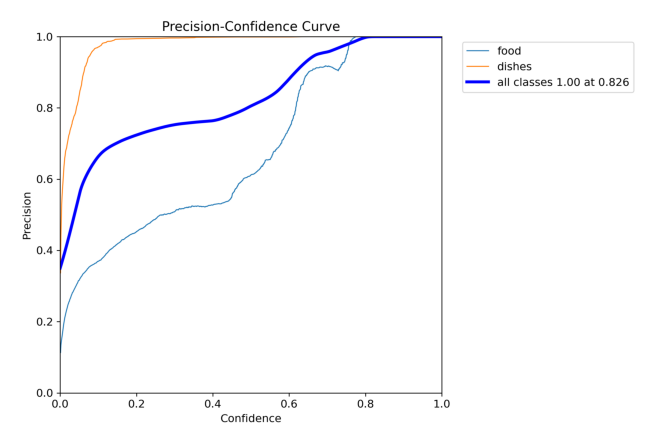

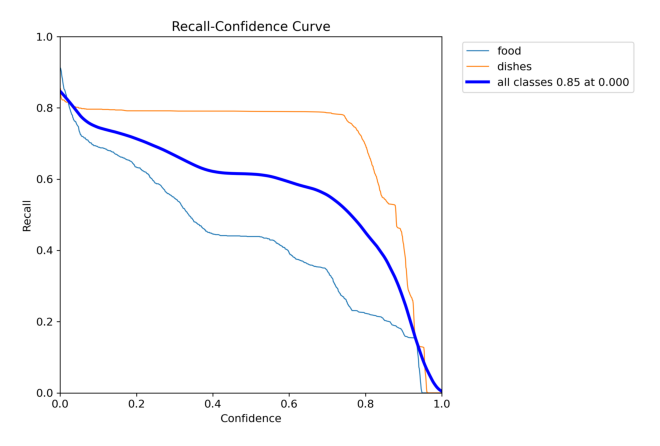

███████████████████████████████ 100% | 18.26/18.26 MB [00:26<00:00,  1.45s/MB]: 
███████████████████████████████ 100% | 18.27/18.27 MB [00:26<00:00,  1.45s/MB]: 
███████████████████████████████ 100% | 18.26/18.26 MB [00:26<00:00,  1.47s/MB]: 
                                             0% | 0.00/0.7 MB [00:00<?, ?MB/s]: 
█████████████████████████████████ 100% | 0.59/0.59 MB [00:01<00:00,  2.33s/MB]: 
██████████████████████████████████ 100% | 0.70/0.7 MB [00:01<00:00,  2.28s/MB]: 

█████████████████████████████████ 100% | 0.57/0.57 MB [00:01<00:00,  2.83s/MB]: 


In [ ]:
model_with_hyp_optimize.train(data="yolo_dataset\yolo_dataset.yaml",
                              epochs=100, 
                              batch=24,
                              imgsz=640,
                              cache=False,
                              device=0,
                              classes=[0,3], 
                              workers=1,
                              patience=10,
                              **cfg_args,
                              )

# Слишком ранняя остановка, при этом метрики еще могли оптимизироваться, поэтому запустим еще раз

In [10]:
model_2_with_opt_hyp = YOLO(r"runs\detect\train15\weights\best.pt")
model_2_with_opt_hyp.train(data=r"yolo_dataset\yolo_dataset.yaml",
                              epochs=100, 
                              batch=48, # увеличим в два раза, т.к. утилизация гпу минимальная
                              imgsz=640, 
                              cache=False,
                              device=0,
                              classes=[0,3], 
                              workers=1,
                            #   patience=10, полностью уберем, посмотрим, что получится 
                              **cfg_args,
                              )

Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=48, bgr=0.0, box=7.73702, cache=False, cfg=None, classes=[0, 3], close_mosaic=10, cls=0.50016, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset\yolo_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.6308, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.48283, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01362, hsv_s=0.7, hsv_v=0.43294, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01018, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs\detect\train15\weights\best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train16, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 2332.4767.0 MB/s, size: 235.7 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs\detect\train16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00034500000000000004), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train16
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        15G     0.5921     0.4448     0.9445       2816        640: 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         87       2437      0.752      0.695      0.723      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      15.2G     0.5208     0.4071     0.9307       3169        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         87       2437      0.859      0.614      0.724      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.1G     0.5119     0.4023     0.9313       3626        640: 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         87       2437      0.784      0.685      0.734      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.9G     0.5148      0.399     0.9316       2958        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         87       2437      0.789      0.693      0.712      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        15G     0.5144     0.4016     0.9315       2709        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         87       2437      0.772      0.695      0.726      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      15.1G     0.5199     0.4001     0.9264       2888        640: 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         87       2437      0.777      0.709      0.739      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        16G     0.5398     0.4054     0.9294       3460        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         87       2437      0.756      0.728      0.691      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        14G     0.5369     0.4086     0.9288       3351        640: 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         87       2437      0.743      0.697      0.685      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.9G     0.5292     0.4076     0.9306       2664        640: 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         87       2437      0.771      0.681      0.723      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      16.7G     0.5379     0.4128     0.9336       2730        640: 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         87       2437      0.781      0.705      0.711      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      15.7G     0.5433     0.4153     0.9359       2777        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         87       2437      0.771      0.733      0.742      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      15.9G     0.5547     0.4143     0.9337       3108        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         87       2437      0.757      0.715       0.71      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.7G     0.5575     0.4225     0.9355       3021        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         87       2437      0.703      0.734      0.683      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        14G     0.5553     0.4176     0.9338       2849        640: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         87       2437      0.848      0.579      0.696      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      15.2G     0.5606     0.4201     0.9399       3524        640: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         87       2437      0.776       0.68      0.727      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      15.8G     0.5507     0.4209     0.9353       2984        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         87       2437      0.777      0.684      0.718      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      15.1G     0.5618     0.4252      0.937       2945        640: 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         87       2437      0.717      0.718      0.689      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.4G     0.5718     0.4257     0.9341       3419        640: 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         87       2437      0.701      0.724      0.684      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.9G     0.5819     0.4308     0.9357       3318        640: 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         87       2437      0.743      0.619      0.669      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      16.1G     0.5613     0.4208     0.9353       2931        640: 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         87       2437      0.695      0.751      0.712      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.7G     0.5852     0.4291     0.9418       3461        640: 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         87       2437      0.686       0.75      0.682       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        15G     0.5654     0.4204     0.9356       3027        640: 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         87       2437      0.719      0.722      0.685      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.9G     0.5389     0.4093     0.9278       3067        640: 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         87       2437      0.728      0.714      0.688      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      15.8G      0.532     0.4084     0.9314       2746        640: 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         87       2437      0.808       0.65      0.692      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.8G      0.538     0.4134     0.9309       2927        640: 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         87       2437      0.792      0.645      0.695      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.1G     0.5357     0.4142     0.9361       2809        640: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         87       2437      0.789      0.658      0.676      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.1G     0.5527     0.4164     0.9334       3225        640: 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         87       2437      0.819      0.658      0.698      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        14G     0.5431     0.4107     0.9293       3766        640: 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         87       2437      0.811      0.652      0.678      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.1G       0.53     0.4121     0.9277       2748        640: 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         87       2437      0.785      0.649      0.712      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        15G     0.5248     0.3999     0.9239       2967        640: 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         87       2437      0.832      0.612      0.707      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.1G     0.5105     0.4018     0.9275       2873        640: 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         87       2437      0.824      0.606      0.696      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      16.3G      0.523     0.4034     0.9253       2831        640: 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         87       2437      0.879      0.591      0.694      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.7G     0.5231     0.4025     0.9238       3293        640: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         87       2437      0.761       0.65      0.676      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.7G     0.5181     0.4004      0.924       3253        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         87       2437      0.704      0.688      0.685      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        15G     0.5176     0.3992     0.9218       3572        640: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         87       2437      0.762      0.658      0.696      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.9G     0.5173     0.4014     0.9223       3095        640: 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         87       2437       0.74      0.697      0.692      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        15G     0.5022     0.3949     0.9248       2629        640: 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         87       2437      0.849      0.612      0.686      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        16G     0.5061     0.3913      0.925       2839        640: 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         87       2437      0.784      0.617      0.662      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        14G     0.5009     0.3897     0.9214       3395        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         87       2437      0.802      0.619      0.693       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        16G     0.5004       0.39     0.9174       3058        640: 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         87       2437       0.78       0.65      0.685      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      15.8G     0.5009     0.3888     0.9226       3244        640: 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         87       2437      0.784      0.653      0.684      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.8G      0.489     0.3823     0.9175       2909        640: 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         87       2437      0.766      0.682      0.689      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.2G     0.4913     0.3855     0.9203       2602        640: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         87       2437      0.768      0.626      0.676      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        16G     0.4928     0.3863     0.9165       2831        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         87       2437      0.656      0.712      0.681      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.1G      0.486     0.3784     0.9181       2772        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         87       2437      0.748      0.603      0.669      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      15.2G     0.4771     0.3797     0.9152       2894        640: 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         87       2437      0.725      0.711      0.691      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      16.1G     0.4881     0.3816     0.9188       3112        640: 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         87       2437      0.844      0.609      0.707      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      15.2G     0.4835     0.3796     0.9202       3072        640:  50%|█████     | 3/6 [00:01<00:01,  1.88it/s]


KeyboardInterrupt: 

Около 50 эпох останавливаем, улучшений метрик не просходит, либо происходит незначительно, идут уменьшения функций потерь, но при таком датасете можем уйти в переобучение, по графикам с train15 видно, что для посуды уже почти предел, по еде улучшения не значительные происходят, остановимся на том, что есть

In [14]:
# Запишем метрики нашей лучшей модели 

model_with_hyp_optimize = YOLO(r"runs\detect\train15\weights\best.pt")

last_result = model_with_hyp_optimize.val()

Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 2137.6508.5 MB/s, size: 237.6 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]


                   all         87       2611      0.371      0.345      0.362      0.243
                  food         87       1121      0.489      0.588      0.594      0.319
                person         75         87          0          0          0          0
          dining table         87         87          0          0          0          0
                dishes         87       1316      0.995      0.792      0.853      0.654
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to runs\detect\val2


In [16]:
# запишем основные метрики 
print("Дообученная базовая модель с оптимизированными параметрами (остановка на 17 эпохах)")
print(f"Precision {last_result.box.p}")
print(f"Recall {last_result.box.r}")
print(f"map50 {last_result.box.map50}")
print(f"map50-95 {last_result.box.map}")

Дообученная базовая модель с оптимизированными параметрами (остановка на 17 эпохах)
Precision [    0.48904           0           0      0.9951]
Recall [    0.58787           0           0     0.79179]
map50 0.36169735365055733
map50-95 0.24317391723947807


Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=48, bgr=0.0, box=7.73702, cache=False, cfg=None, classes=[0, 3], close_mosaic=10, cls=0.50016, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset\yolo_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.6308, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.48283, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01362, hsv_s=0.7, hsv_v=0.43294, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01018, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train17, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspectiv

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 2903.4247.7 MB/s, size: 235.7 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs\detect\train17\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00034500000000000004), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train17
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      16.3G      1.427      3.354      1.431       2816        640: 100%|██████████| 6/6 [00:07<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         87       2437     0.0352      0.302     0.0317     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      15.3G      1.155      1.819      1.255       3169        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         87       2437      0.507      0.685      0.544      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.3G     0.9552     0.8543      1.115       3626        640: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         87       2437      0.501      0.581      0.534      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      15.1G     0.8688     0.7103      1.065       2958        640: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         87       2437      0.642      0.604      0.593      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      15.3G     0.8152     0.6553      1.038       2709        640: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         87       2437      0.657      0.624      0.626      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      15.3G     0.7735     0.6007      1.014       2888        640: 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         87       2437      0.611      0.681      0.636      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      16.2G     0.7628     0.5738      1.005       3460        640: 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         87       2437      0.604      0.654      0.607      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.2G     0.7384     0.5505     0.9981       3351        640: 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         87       2437       0.52      0.593      0.537      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.1G     0.7179     0.5397     0.9915       2664        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         87       2437      0.591       0.65      0.606       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      16.9G     0.7404     0.5434     0.9955       2730        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         87       2437       0.61      0.553      0.617      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      15.9G     0.7259     0.5325     0.9911       2777        640: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         87       2437       0.88      0.546      0.673      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      16.2G     0.7016     0.5127     0.9785       3108        640: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         87       2437      0.606       0.64      0.621      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.9G     0.6909     0.5071     0.9754       3021        640: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         87       2437       0.71      0.612      0.639      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      14.3G      0.676     0.4997     0.9702       2849        640: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         87       2437      0.678      0.669      0.644      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      15.4G     0.6613     0.4873     0.9712       3524        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         87       2437      0.707      0.582      0.624      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        16G     0.6589     0.4914     0.9661       2984        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         87       2437      0.734      0.566      0.641      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      15.3G     0.6389     0.4847     0.9612       2945        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         87       2437      0.574      0.579       0.53      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.7G      0.632     0.4834     0.9562       3419        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         87       2437      0.472      0.661      0.556      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      15.1G     0.6285     0.4784     0.9524       3318        640: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         87       2437      0.533      0.616      0.588      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      16.3G     0.6289     0.4662     0.9573       2931        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         87       2437      0.742      0.581      0.663      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.9G     0.6239     0.4692     0.9579       3461        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         87       2437      0.598      0.719      0.641      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      15.2G     0.6332     0.4658     0.9543       3027        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         87       2437      0.656      0.727      0.685      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      15.1G     0.6026     0.4514      0.946       3067        640: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         87       2437      0.712      0.669      0.664      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      16.1G     0.5962     0.4495       0.95       2746        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         87       2437      0.763      0.718      0.676      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        15G     0.5954     0.4474     0.9467       2927        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         87       2437      0.718      0.726      0.669       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.3G     0.5815     0.4455     0.9503       2809        640: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         87       2437      0.676      0.702      0.651      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.4G     0.5988     0.4487     0.9473       3225        640: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         87       2437      0.739      0.603      0.676      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.2G     0.5975     0.4462     0.9438       3766        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         87       2437      0.758      0.649      0.677      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.3G     0.5775     0.4399     0.9403       2748        640: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         87       2437      0.758      0.728      0.697       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      15.2G     0.5618      0.424     0.9333       2967        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         87       2437      0.737      0.735       0.71      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.3G     0.5472     0.4237     0.9378       2873        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         87       2437      0.716      0.732      0.701      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      16.5G     0.5509     0.4223     0.9331       2831        640: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         87       2437      0.777      0.723      0.707      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.9G     0.5475     0.4192     0.9324       3293        640: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         87       2437      0.746      0.681      0.684      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.9G     0.5481      0.418     0.9337       3253        640: 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         87       2437      0.813      0.637      0.714      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      15.2G     0.5463     0.4185      0.931       3572        640: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         87       2437      0.754      0.681        0.7      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      15.1G     0.5575     0.4282     0.9332       3095        640: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         87       2437      0.756      0.703      0.714      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      15.2G     0.5337     0.4165     0.9334       2629        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         87       2437      0.799      0.645      0.702      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      16.2G     0.5344     0.4136     0.9331       2839        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         87       2437      0.755      0.733      0.693      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.2G     0.5275     0.4081     0.9302       3395        640: 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         87       2437       0.76      0.662      0.694      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      16.2G     0.5309     0.4118     0.9257       3058        640: 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         87       2437      0.773      0.644      0.687      0.454
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



40 epochs completed in 0.042 hours.
Optimizer stripped from runs\detect\train17\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train17\weights\best.pt, 19.2MB

Validating runs\detect\train17\weights\best.pt...
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


                   all         87       2437      0.738      0.734       0.71      0.461
                  food         87       1121      0.492      0.676      0.593       0.29
                dishes         87       1316      0.984      0.792      0.826      0.631
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train17


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000128046879A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

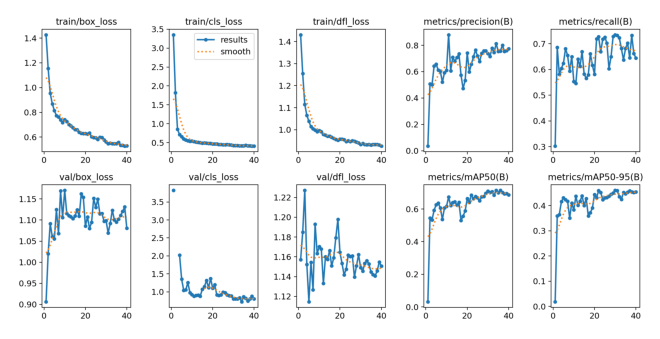

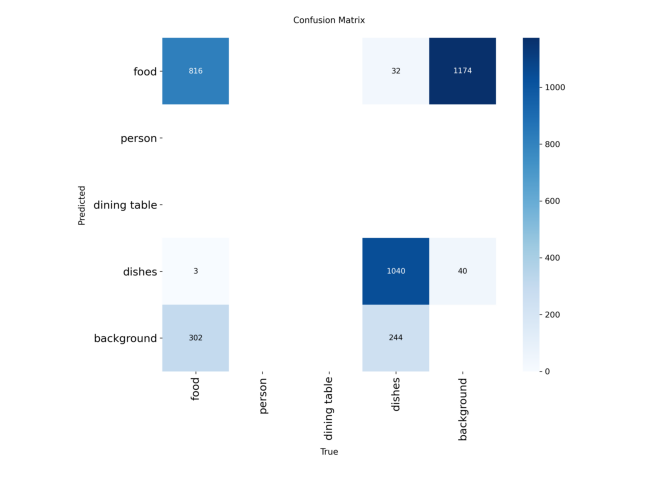

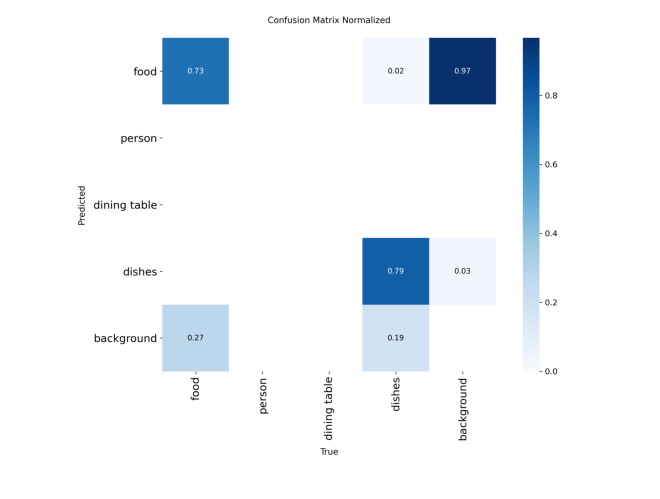

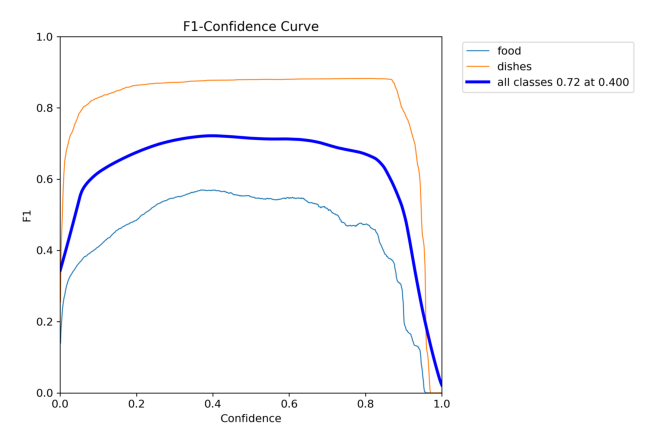

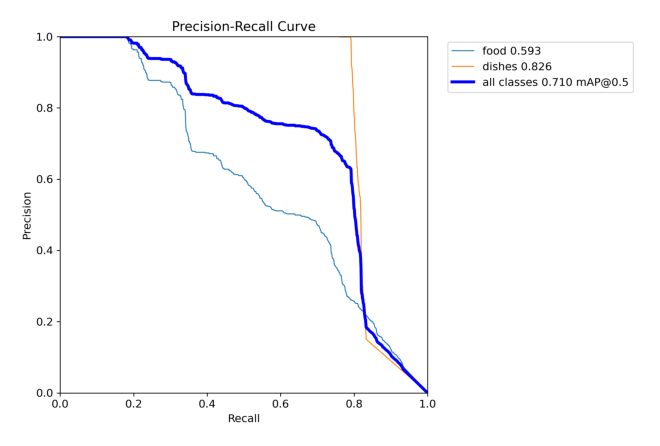

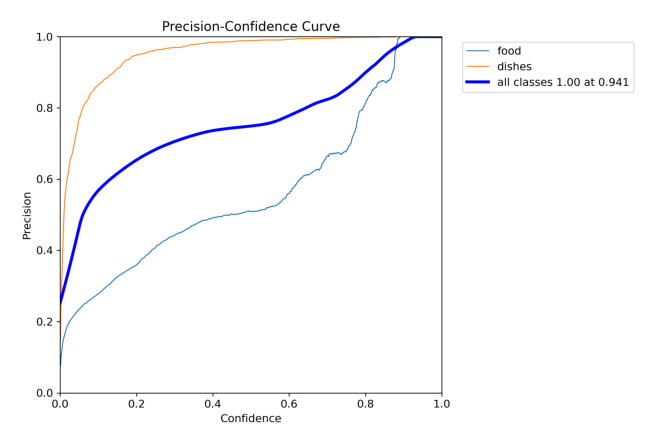

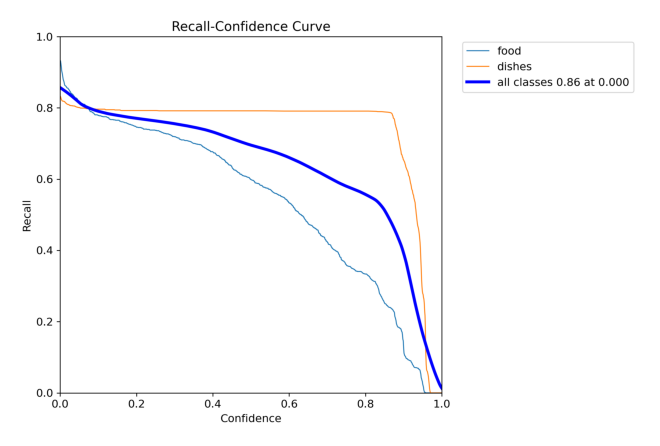

In [17]:
# обучим теперь модель на этих же параметрах, но с нуля
optimized_model = YOLO(r"yolo11s.pt")
optimized_model.train(data=r"yolo_dataset\yolo_dataset.yaml",
                              epochs=100, 
                              batch=48, # увеличим в два раза, т.к. утилизация гпу минимальная
                              imgsz=640, 
                              cache=False,
                              device=0,
                              classes=[0,3], 
                              workers=1,
                              patience=10,
                              **cfg_args,
                              )

# Соберем результаты в одном месте

In [9]:
#  дополнительно по всем моделям посмотрим f1 
base_stop_10_model = YOLO(r"runs\detect\train9\weights\best.pt")
base_no_stop_model = YOLO(r"runs\detect\train10\weights\best.pt")
tune_base_with_opt_hyp_model = YOLO(r"runs\detect\train15\weights\best.pt")
opt_hyp_no_stop_model = YOLO(r"runs\detect\train17\weights\best.pt")

In [10]:
res1 = base_stop_10_model.val(classes=[0,3])
res2 = base_no_stop_model.val(classes=[0,3])
res3 = tune_base_with_opt_hyp_model.val(classes=[0,3])
res4 = opt_hyp_no_stop_model.val(classes=[0,3])

Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2390.1638.0 MB/s, size: 237.2 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]


                   all         87       2437      0.667      0.727      0.642      0.436
                  food         87       1121      0.354      0.659      0.436      0.253
                dishes         87       1316       0.98      0.795      0.847       0.62
Speed: 1.2ms preprocess, 6.3ms inference, 0.0ms loss, 14.3ms postprocess per image
Results saved to runs\detect\val12
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2781.4235.5 MB/s, size: 237.6 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]


                   all         87       2437      0.761      0.699      0.714      0.482
                  food         87       1121      0.546      0.587      0.559      0.301
                dishes         87       1316      0.976      0.811      0.869      0.663
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 14.2ms postprocess per image
Results saved to runs\detect\val13
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2666.1387.4 MB/s, size: 239.4 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]


                   all         87       2437      0.742       0.69      0.723      0.486
                  food         87       1121      0.489      0.588      0.594      0.319
                dishes         87       1316      0.995      0.792      0.853      0.654
Speed: 3.8ms preprocess, 8.4ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs\detect\val14
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1873.1203.9 MB/s, size: 238.0 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]


                   all         87       2437      0.737      0.735       0.71      0.464
                  food         87       1121       0.49      0.679      0.594      0.295
                dishes         87       1316      0.984      0.792      0.827      0.632
Speed: 0.8ms preprocess, 4.2ms inference, 0.0ms loss, 12.8ms postprocess per image
Results saved to runs\detect\val15


In [52]:
import pandas as pd
import yaml

with open('yolo_dataset\\yolo_dataset.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)
class_names = yaml_data['names']

table_data = {
    'Model': ['base_stop_10_model', 'base_no_stop_model', 'tune_base_with_opt_hyp_model', 'opt_hyp_no_stop_model'],
    'mAP50': [res1.box.map50, res2.box.map50, res3.box.map50, res4.box.map50],
    'mAP50:95': [res1.box.map, res2.box.map, res3.box.map, res4.box.map]
}

for metric_name, metric_data in [('F1', [res1.box.f1, res2.box.f1, res3.box.f1, res4.box.f1]), 
                                ('Precision', [res1.box.p, res2.box.p, res3.box.p, res4.box.p]), 
                                ('Recall', [res1.box.r, res2.box.r, res3.box.r, res4.box.r])]:
    for i, class_name in enumerate(class_names if len(class_names) >= 2 else class_names + ['unknown'] * (2 - len(class_names))):
        if i >= 2:
            break
        table_data[f'{metric_name} ({class_name})'] = [metric_data[j][i] for j in range(4)]

df = pd.DataFrame(table_data)
df

,Model,mAP50,mAP50:95,F1 (0),F1 (1),Precision (0),Precision (1),Recall (0),Recall (1)
0,base_stop_10_model,0.6417,0.4361,0.4605,0.8777,0.3540,0.9797,0.6589,0.7948
1,base_no_stop_model,0.7141,0.4818,0.5659,0.8859,0.5462,0.9764,0.5870,0.8108
2,tune_base_with_opt_hyp_model,0.7234,0.4863,0.5339,0.8819,0.4890,0.9951,0.5879,0.7918
3,opt_hyp_no_stop_model,0.7104,0.4635,0.5695,0.8775,0.4904,0.9841,0.6791,0.7918


По соотношению метрик наилучший результат показывает base_no_stop_model

Значит базовые гиперпараметры подходят лучше всего. 

Запустим обучение с нуля и увеличим аугментацию.

In [2]:
from ultralytics import YOLO 
base_model_with_modify_augment = YOLO("yolo11s.pt")

По большей части используем дефолтные аугментации и добавляем немного поворотов, если дефолтные параметры и повороты никак не изменят ситуацию, то проблема в разнообразности самого датасета 

Перед тем как дойти до этих параметров гиперпараметров прошелся по нескольким вариантам 

Пришел к выводу, что стоит чуть понизить стандартные цветовые аугментации для этой задачи и добавил немного поворотов, остальные аугментации добавляют слишком сильные искажения. Так же подключил albumentations.

In [7]:
import yaml
cfg = r'runs\detect\train195\args.yaml'
with open(cfg, "r") as stream:
    try:
        cfg_args = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

Из основного, размер батча уменьшен до 4 т.к. постоянно выбивает за пределы памяти, да это вызовет проблемы утилизации gpu и может добавить шума, но дальше попробуем иной способ аугментации. Основной смысл - пробуем пространственные аугментации из коробки. Если не получим результат лучше, то от yolo возьмем только базовые аугментации, а для остального используем Albumentations.

In [8]:
res5 = base_model_with_modify_augment.train(**cfg_args)

New https://pypi.org/project/ultralytics/8.3.159 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[0, 3], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.15, data=C:\Users\\Desktop\zebra_test\yolo_dataset\yolo_dataset.yaml, degrees=5, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.01, flipud=0.01, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.2, hsv_s=0.2, hsv_v=0.2, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=0.4, multi_scale=False, name=train19510

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access  (ping: 0.00.0 ms, read: 1504.1143.6 MB/s, size: 235.7 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs\detect\train19510\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train19510
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.27G     0.6267     0.4634     0.8863        118        640: 100%|██████████| 72/72 [00:08<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.89it/s]

                   all         87       2437      0.738      0.657      0.655      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.27G     0.6648     0.4906     0.8965         68        640: 100%|██████████| 72/72 [00:08<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.11it/s]

                   all         87       2437      0.797      0.618      0.658       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.27G     0.6644     0.4865     0.8933         47        640: 100%|██████████| 72/72 [00:07<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.65it/s]

                   all         87       2437      0.803      0.599      0.618      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.27G      0.676     0.4906     0.8907         40        640: 100%|██████████| 72/72 [00:07<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.80it/s]

                   all         87       2437      0.761      0.643      0.633      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.27G     0.6903     0.4955      0.903         29        640: 100%|██████████| 72/72 [00:07<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.43it/s]

                   all         87       2437      0.788       0.66      0.647      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.27G     0.6502     0.4862     0.8896         20        640: 100%|██████████| 72/72 [00:08<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.45it/s]

                   all         87       2437      0.779      0.674      0.648      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.27G     0.6776     0.4903     0.9004         88        640: 100%|██████████| 72/72 [00:09<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.28it/s]

                   all         87       2437       0.73      0.649      0.618      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.27G     0.6506      0.477     0.8903         65        640: 100%|██████████| 72/72 [00:07<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.20it/s]


                   all         87       2437      0.758      0.661      0.622      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.27G     0.6884     0.4885     0.9029         43        640: 100%|██████████| 72/72 [00:08<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.38it/s]

                   all         87       2437      0.768      0.662       0.67      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.27G     0.6721     0.4831     0.8944         67        640: 100%|██████████| 72/72 [00:08<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.09it/s]

                   all         87       2437      0.786      0.687       0.66      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.27G     0.6492     0.4811     0.8927         42        640: 100%|██████████| 72/72 [00:07<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.52it/s]

                   all         87       2437       0.75       0.69      0.669      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.27G     0.6345     0.4709     0.8824         22        640: 100%|██████████| 72/72 [00:07<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.91it/s]

                   all         87       2437      0.737      0.672       0.63      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.27G     0.6171     0.4556     0.8774         46        640: 100%|██████████| 72/72 [00:07<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 12.09it/s]

                   all         87       2437       0.73      0.669      0.629      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.27G     0.6224     0.4541     0.8841         71        640: 100%|██████████| 72/72 [00:07<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.80it/s]

                   all         87       2437      0.774      0.599      0.627        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.27G     0.6267     0.4602     0.8803         88        640: 100%|██████████| 72/72 [00:07<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.85it/s]

                   all         87       2437      0.779      0.643      0.618      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.27G     0.6385     0.4653      0.885         45        640: 100%|██████████| 72/72 [00:08<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.69it/s]

                   all         87       2437      0.717      0.685       0.62      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.27G     0.6227     0.4596      0.877         43        640: 100%|██████████| 72/72 [00:07<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.57it/s]

                   all         87       2437      0.727      0.662      0.608      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.27G     0.6083     0.4544     0.8807         21        640: 100%|██████████| 72/72 [00:08<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.64it/s]

                   all         87       2437      0.696      0.667      0.618      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.27G     0.6183     0.4592     0.8772         41        640: 100%|██████████| 72/72 [00:08<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.42it/s]

                   all         87       2437       0.74      0.611      0.623      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.27G     0.6211     0.4623     0.8858         43        640: 100%|██████████| 72/72 [00:08<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.42it/s]

                   all         87       2437       0.71      0.651      0.622      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.27G     0.6098      0.449     0.8746         47        640: 100%|██████████| 72/72 [00:08<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.42it/s]

                   all         87       2437      0.713      0.686      0.649      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.27G     0.6283     0.4616     0.8907         22        640: 100%|██████████| 72/72 [00:08<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.17it/s]

                   all         87       2437      0.729      0.702      0.654      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.27G     0.6153     0.4523     0.8813         47        640: 100%|██████████| 72/72 [00:07<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.73it/s]

                   all         87       2437        0.7      0.676      0.616      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.27G     0.6324     0.4569     0.8806         88        640: 100%|██████████| 72/72 [00:08<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.34it/s]

                   all         87       2437      0.704      0.688      0.637      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.27G     0.6159     0.4514      0.876         43        640: 100%|██████████| 72/72 [00:08<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.62it/s]

                   all         87       2437      0.785      0.619      0.639      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.27G     0.6124       0.45     0.8783         36        640: 100%|██████████| 72/72 [00:08<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.34it/s]

                   all         87       2437      0.742      0.617      0.633      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.27G     0.5754     0.4319     0.8652         47        640: 100%|██████████| 72/72 [00:07<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.94it/s]

                   all         87       2437      0.786      0.644      0.663       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.27G     0.5891     0.4461     0.8754         82        640: 100%|██████████| 72/72 [00:08<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.99it/s]

                   all         87       2437      0.751       0.69      0.662      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.27G     0.5727     0.4327     0.8649         47        640: 100%|██████████| 72/72 [00:07<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.89it/s]


                   all         87       2437      0.685      0.735      0.649      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.27G     0.5848     0.4373     0.8714         45        640: 100%|██████████| 72/72 [00:08<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.77it/s]

                   all         87       2437      0.804      0.608      0.632      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.27G     0.5664     0.4306     0.8652         44        640: 100%|██████████| 72/72 [00:07<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.33it/s]

                   all         87       2437       0.71       0.66      0.627      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.27G     0.5836     0.4328     0.8677        151        640: 100%|██████████| 72/72 [00:07<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.26it/s]

                   all         87       2437      0.743      0.689      0.649      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.27G     0.5904     0.4409     0.8743         47        640: 100%|██████████| 72/72 [00:07<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.15it/s]

                   all         87       2437      0.716      0.671      0.627       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.27G     0.5692     0.4386     0.8762          6        640: 100%|██████████| 72/72 [00:08<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.16it/s]

                   all         87       2437      0.779      0.612      0.617      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.27G     0.5814      0.437     0.8705         49        640: 100%|██████████| 72/72 [00:07<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:00<00:00, 11.44it/s]

                   all         87       2437      0.697      0.682      0.634      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.27G     0.5882     0.4417     0.8742         40        640: 100%|██████████| 72/72 [00:07<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.96it/s]

                   all         87       2437      0.688      0.708      0.656      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.27G     0.6058     0.4429     0.8736        154        640: 100%|██████████| 72/72 [00:07<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.37it/s]

                   all         87       2437      0.696      0.703       0.65       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.27G     0.6158     0.4473     0.8795        120        640: 100%|██████████| 72/72 [00:08<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  9.35it/s]

                   all         87       2437      0.677      0.709      0.606      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.27G      0.578     0.4306     0.8663        124        640: 100%|██████████| 72/72 [00:08<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.63it/s]

                   all         87       2437      0.678      0.704      0.632      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.27G     0.5859     0.4351     0.8734         46        640: 100%|██████████| 72/72 [00:08<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.72it/s]

                   all         87       2437      0.692      0.693      0.629      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.27G     0.5762     0.4329     0.8761          6        640: 100%|██████████| 72/72 [00:08<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00, 10.38it/s]

                   all         87       2437      0.711      0.703       0.61      0.383
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



41 epochs completed in 0.124 hours.
Optimizer stripped from runs\detect\train19510\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train19510\weights\best.pt, 19.2MB

Validating runs\detect\train19510\weights\best.pt...
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  8.08it/s]


                   all         87       2437       0.75       0.69      0.669      0.428
                  food         87       1121      0.506      0.585      0.488      0.239
                dishes         87       1316      0.994      0.796      0.849      0.617
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs\detect\train19510


███████████████████████████████ 100% | 18.27/18.27 MB [00:25<00:00,  1.40s/MB]: 
███████████████████████████████ 100% | 18.27/18.27 MB [00:26<00:00,  1.43s/MB]: 


In [12]:
import pandas as pd
import yaml

with open('yolo_dataset\\yolo_dataset.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)
class_names = yaml_data['names']

table_data = {
    'Model': ['base_stop_10_model', 'base_no_stop_model', 'tune_base_with_opt_hyp_model', 'opt_hyp_no_stop_model', 'base_model_with_modify_augment'],
    'mAP50': [res1.box.map50, res2.box.map50, res3.box.map50, res4.box.map50, res5.box.map50],
    'mAP50:95': [res1.box.map, res2.box.map, res3.box.map, res4.box.map, res5.box.map]
}

for metric_name, metric_data in [('F1', [res1.box.f1, res2.box.f1, res3.box.f1, res4.box.f1, res5.box.f1 ]), 
                                ('Precision', [res1.box.p, res2.box.p, res3.box.p, res4.box.p, res5.box.p]), 
                                ('Recall', [res1.box.r, res2.box.r, res3.box.r, res4.box.r, res5.box.r])]:
    for i, class_name in enumerate(class_names if len(class_names) >= 2 else class_names + ['unknown'] * (2 - len(class_names))):
        if i >= 2:
            break
        table_data[f'{metric_name} ({class_name})'] = [metric_data[j][i] for j in range(5)]

df = pd.DataFrame(table_data)
df

,Model,mAP50,mAP50:95,F1 (0),F1 (1),Precision (0),Precision (1),Recall (0),Recall (1)
0,base_stop_10_model,0.641672,0.436127,0.460537,0.877651,0.353976,0.979734,0.658886,0.794833
1,base_no_stop_model,0.714060,0.481834,0.565869,0.885928,0.546228,0.976414,0.586976,0.810790
2,tune_base_with_opt_hyp_model,0.723395,0.486348,0.533918,0.881882,0.489037,0.995103,0.587868,0.791793
3,opt_hyp_no_stop_model,0.710448,0.463533,0.569541,0.877538,0.490423,0.984108,0.679098,0.791793
4,base_model_with_modify_augment,0.668738,0.428136,0.542922,0.883986,0.506485,0.994475,0.585007,0.795593


Улучшения дополнительными аугментация не получили, использовали следующие 

hsv_h: 0.2
hsv_s: 0.2
hsv_v: 0.2
degrees: 5
translate: 0.2
scale: 0.5
shear: 5
flipud: 0.01
fliplr: 0.01
mosaic: 0.4
mixup: 0.1
cutmix: 0.15

После подобной аугментации модель стала делать больше ошибок в локализации и больше путать фон с объектом, при этом сама детекция лучше не стала. Возможно аугментация слишком агрессивная. СДелаем более лайтовую через albumentations. 

# Попробуем использовать стандартные параметры с albumentations 

In [16]:
from ultralytics import YOLO

base_model_with_albumentations = YOLO('yolo11s.pt')

res6 = base_model_with_albumentations.train(data='yolo_dataset\yolo_dataset.yaml', device=0, classes=[0, 3])

<>:5: SyntaxWarning:

invalid escape sequence '\y'

<>:5: SyntaxWarning:

invalid escape sequence '\y'

C:\Users\Администратор\AppData\Local\Temp\ipykernel_21088\4189001356.py:5: SyntaxWarning:

invalid escape sequence '\y'



New https://pypi.org/project/ultralytics/8.3.159 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[0, 3], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset\yolo_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train23, nbs=64, nms=False, opset=Non

train: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\train.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access  (ping: 0.10.1 ms, read: 1083.4378.6 MB/s, size: 235.7 KB)


val: Scanning C:\Users\Администратор\Desktop\zebra_test\yolo_dataset\labels\val.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]


Plotting labels to runs\detect\train23\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train23
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.16G      1.152      1.952      1.155        992        640: 100%|██████████| 18/18 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         87       2437      0.484      0.574      0.476      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.22G     0.8879      0.749     0.9962        862        640: 100%|██████████| 18/18 [00:03<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all         87       2437      0.659      0.526      0.577      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.22G     0.8403     0.6785     0.9735        794        640: 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         87       2437       0.66      0.593      0.585      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.22G     0.7942     0.6317     0.9433        805        640: 100%|██████████| 18/18 [00:03<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         87       2437       0.61      0.626      0.558      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.24G     0.7964      0.606      0.937        793        640: 100%|██████████| 18/18 [00:03<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         87       2437      0.632      0.577      0.609      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.24G     0.8129     0.6046     0.9436        984        640: 100%|██████████| 18/18 [00:03<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         87       2437       0.67      0.668      0.616      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.24G     0.7548     0.5722     0.9277        933        640: 100%|██████████| 18/18 [00:03<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         87       2437      0.639      0.681      0.594      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.24G     0.7201     0.5488     0.9181       1186        640: 100%|██████████| 18/18 [00:03<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         87       2437      0.762      0.735      0.656      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.24G      0.709     0.5283     0.9078        987        640: 100%|██████████| 18/18 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]


                   all         87       2437      0.699      0.665      0.614      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.24G     0.6764     0.5196     0.9022        836        640: 100%|██████████| 18/18 [00:03<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]

                   all         87       2437      0.771      0.577      0.609      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.24G     0.6566     0.5044     0.8995        853        640: 100%|██████████| 18/18 [00:03<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]


                   all         87       2437      0.711      0.719      0.646      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.24G     0.6543     0.4985     0.9003        728        640: 100%|██████████| 18/18 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]


                   all         87       2437      0.732      0.712      0.642        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.24G     0.6392     0.4872     0.8944        933        640: 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         87       2437      0.689      0.699      0.629       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.24G     0.6353     0.4813     0.8938       1125        640: 100%|██████████| 18/18 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

                   all         87       2437      0.695      0.675      0.633      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.24G     0.6479     0.4854     0.8924        797        640: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

                   all         87       2437      0.652      0.714      0.603      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.24G     0.6143     0.4707     0.8808        747        640: 100%|██████████| 18/18 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         87       2437      0.676      0.722      0.604      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.25G     0.6048      0.464     0.8799        898        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]


                   all         87       2437      0.678      0.706      0.608      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.28G     0.5863     0.4617     0.8766        825        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         87       2437      0.718      0.658      0.627      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.28G       0.59     0.4558     0.8782       1143        640: 100%|██████████| 18/18 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         87       2437      0.755      0.684      0.634      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       6.3G     0.5787     0.4537     0.8789       1037        640: 100%|██████████| 18/18 [00:03<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         87       2437      0.734      0.641       0.63      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.32G     0.5959     0.4602     0.8758        975        640: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         87       2437       0.74      0.646      0.642      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.32G     0.5645     0.4455     0.8708        894        640: 100%|██████████| 18/18 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]


                   all         87       2437      0.688      0.693      0.625      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.33G     0.5753     0.4472     0.8727        830        640: 100%|██████████| 18/18 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         87       2437      0.707      0.649      0.607        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.36G     0.5763     0.4444     0.8685        983        640: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]

                   all         87       2437      0.765      0.663       0.66      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.36G     0.5666     0.4413     0.8702       1025        640: 100%|██████████| 18/18 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         87       2437      0.734      0.692      0.649      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.38G     0.5654     0.4382     0.8683       1216        640: 100%|██████████| 18/18 [00:03<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

                   all         87       2437      0.744      0.692      0.644       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       6.4G      0.553     0.4428      0.865        809        640: 100%|██████████| 18/18 [00:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         87       2437      0.708      0.699      0.649      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       6.4G     0.5625     0.4404     0.8747        960        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         87       2437      0.732      0.651      0.634      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.41G     0.5414     0.4249     0.8616       1012        640: 100%|██████████| 18/18 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]


                   all         87       2437      0.721      0.711      0.679      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.44G     0.5369     0.4265     0.8647        815        640: 100%|██████████| 18/18 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         87       2437      0.727      0.738      0.693      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.44G      0.536      0.427     0.8625        798        640: 100%|██████████| 18/18 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         87       2437      0.718       0.74      0.673      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.46G     0.5279      0.424     0.8634        641        640: 100%|██████████| 18/18 [00:03<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


                   all         87       2437      0.723      0.717      0.663       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.46G     0.5279     0.4198     0.8638       1025        640: 100%|██████████| 18/18 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         87       2437      0.727      0.691      0.691      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.46G     0.5366     0.4244      0.864       1058        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         87       2437      0.735      0.732      0.672      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.46G     0.5338     0.4152     0.8609        752        640: 100%|██████████| 18/18 [00:02<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         87       2437      0.784      0.696      0.689      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.46G     0.5264     0.4118     0.8551        806        640: 100%|██████████| 18/18 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]

                   all         87       2437      0.742       0.72      0.685      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.46G     0.5222     0.4125     0.8602        878        640: 100%|██████████| 18/18 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         87       2437        0.8       0.67      0.696      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.46G     0.5261     0.4122     0.8609        858        640: 100%|██████████| 18/18 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         87       2437      0.865      0.644      0.705      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.46G     0.5174     0.4099     0.8553        944        640: 100%|██████████| 18/18 [00:02<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         87       2437      0.819      0.672      0.696      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.46G     0.5214     0.4097     0.8562       1096        640: 100%|██████████| 18/18 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]

                   all         87       2437      0.723      0.728      0.679      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.46G     0.5158     0.4087     0.8529        904        640: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]

                   all         87       2437      0.828      0.614      0.673      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.46G     0.5077     0.4043     0.8541       1145        640: 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         87       2437      0.754      0.663      0.672      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.46G     0.5065     0.4059      0.854        978        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.88it/s]

                   all         87       2437      0.758      0.714      0.702      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.46G     0.5063     0.4035     0.8577        758        640: 100%|██████████| 18/18 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         87       2437      0.796      0.649       0.69      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.46G     0.4965     0.4004     0.8545       1035        640: 100%|██████████| 18/18 [00:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         87       2437      0.733      0.721      0.692      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.46G     0.4972     0.4005     0.8515        971        640: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         87       2437      0.801      0.718      0.709      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.46G     0.4952     0.4006     0.8511        761        640: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         87       2437      0.818      0.607      0.656      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.46G     0.4992     0.3982     0.8549        821        640: 100%|██████████| 18/18 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         87       2437      0.844      0.614      0.691      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.46G     0.4889     0.3938      0.853       1008        640: 100%|██████████| 18/18 [00:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         87       2437      0.754      0.658      0.669      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.46G     0.4876     0.3917     0.8509       1012        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]

                   all         87       2437      0.717      0.675      0.675      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.46G     0.4822     0.3896      0.847       1076        640: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]

                   all         87       2437      0.845      0.602      0.693      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.46G     0.4779     0.3896      0.848        753        640: 100%|██████████| 18/18 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         87       2437      0.764      0.679      0.697      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.46G     0.4816     0.3849     0.8513        784        640: 100%|██████████| 18/18 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         87       2437      0.755      0.714      0.687       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.46G     0.4758     0.3891     0.8478       1085        640: 100%|██████████| 18/18 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         87       2437      0.748      0.701      0.706      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.46G      0.479      0.387     0.8425       1041        640: 100%|██████████| 18/18 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         87       2437      0.738      0.707      0.705      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.46G     0.4806     0.3885     0.8464        879        640: 100%|██████████| 18/18 [00:02<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]

                   all         87       2437       0.84      0.646      0.709      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.46G     0.4724     0.3869     0.8431        977        640: 100%|██████████| 18/18 [00:03<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         87       2437      0.734      0.713      0.683      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.46G     0.4814     0.3865     0.8479        732        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         87       2437      0.884      0.634      0.697      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.46G     0.4693     0.3888     0.8444        961        640: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]

                   all         87       2437      0.867      0.626      0.695      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.46G     0.4744     0.3835     0.8472        931        640: 100%|██████████| 18/18 [00:03<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         87       2437      0.773      0.642      0.677      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.46G     0.4697     0.3794     0.8437        813        640: 100%|██████████| 18/18 [00:03<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         87       2437       0.83      0.599       0.67      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.46G     0.4573     0.3708     0.8425       1070        640: 100%|██████████| 18/18 [00:03<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]

                   all         87       2437      0.729      0.653      0.651      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.46G     0.4495     0.3727     0.8406        873        640: 100%|██████████| 18/18 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         87       2437      0.838      0.594      0.676      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.46G     0.4514     0.3725      0.842        846        640: 100%|██████████| 18/18 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         87       2437       0.74      0.713      0.683      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.46G     0.4535     0.3747     0.8403       1103        640: 100%|██████████| 18/18 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         87       2437      0.755      0.704      0.701      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.46G     0.4471     0.3674      0.837        708        640: 100%|██████████| 18/18 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]

                   all         87       2437      0.739      0.697      0.701      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.46G      0.445     0.3651     0.8367        850        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         87       2437       0.75      0.698      0.706      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.46G     0.4542     0.3691      0.839        895        640: 100%|██████████| 18/18 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         87       2437      0.737      0.699      0.711      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.46G      0.443     0.3637     0.8418        660        640: 100%|██████████| 18/18 [00:02<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]

                   all         87       2437      0.752      0.701      0.714      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.46G     0.4418     0.3669     0.8416       1027        640: 100%|██████████| 18/18 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         87       2437      0.734      0.703      0.692      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.46G     0.4472     0.3682       0.84        958        640: 100%|██████████| 18/18 [00:03<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         87       2437       0.84      0.607      0.694      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.46G     0.4406     0.3625     0.8375       1039        640: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         87       2437      0.848      0.604      0.696      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.46G     0.4428     0.3627     0.8361        757        640: 100%|██████████| 18/18 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]

                   all         87       2437      0.736      0.674      0.684      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.46G     0.4412     0.3613     0.8385        838        640: 100%|██████████| 18/18 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         87       2437      0.712      0.707      0.677      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.46G     0.4414     0.3615     0.8387        746        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]

                   all         87       2437      0.715        0.7      0.683      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.46G     0.4334     0.3582     0.8385        855        640: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         87       2437      0.719      0.732       0.69      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.46G     0.4289     0.3602      0.837        774        640: 100%|██████████| 18/18 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         87       2437      0.755      0.653       0.69      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.46G     0.4216     0.3549     0.8359        632        640: 100%|██████████| 18/18 [00:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]

                   all         87       2437      0.727      0.716      0.704      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.46G     0.4276     0.3589     0.8404       1148        640: 100%|██████████| 18/18 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         87       2437      0.733      0.714      0.702      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.46G     0.4242     0.3508     0.8307       1053        640: 100%|██████████| 18/18 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         87       2437      0.784      0.643      0.689      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.46G     0.4265     0.3513     0.8374        855        640: 100%|██████████| 18/18 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         87       2437      0.775      0.657      0.703      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.46G     0.4288      0.359       0.84        736        640: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         87       2437      0.722      0.713      0.689      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.46G     0.4316     0.3554     0.8362       1124        640: 100%|██████████| 18/18 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         87       2437      0.725      0.702      0.693      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.46G     0.4216     0.3518      0.835       1036        640: 100%|██████████| 18/18 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         87       2437      0.722      0.704      0.691      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.46G     0.4147     0.3489     0.8331        948        640: 100%|██████████| 18/18 [00:03<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all         87       2437      0.714      0.712      0.699      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.46G     0.4158     0.3465      0.834        985        640: 100%|██████████| 18/18 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         87       2437      0.794       0.63      0.691      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.46G     0.4154     0.3485     0.8349        778        640: 100%|██████████| 18/18 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

                   all         87       2437      0.841      0.605      0.692      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.46G     0.4065     0.3456     0.8311        989        640: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]

                   all         87       2437      0.718      0.699      0.697      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.46G     0.4104     0.3432     0.8323        586        640: 100%|██████████| 18/18 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         87       2437      0.788      0.633      0.705      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.46G     0.4101     0.3452     0.8338        789        640: 100%|██████████| 18/18 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]

                   all         87       2437      0.743      0.715      0.709      0.483


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.46G      0.404     0.3495     0.8246        529        640: 100%|██████████| 18/18 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         87       2437       0.74      0.718      0.699       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.46G     0.4066     0.3459     0.8219        484        640: 100%|██████████| 18/18 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         87       2437       0.73      0.722      0.699      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.46G     0.3841     0.3313     0.8177        542        640: 100%|██████████| 18/18 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         87       2437      0.743      0.707      0.699      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.46G     0.3755     0.3315     0.8195        473        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]

                   all         87       2437      0.739      0.704      0.695      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.46G     0.3822     0.3284      0.819        550        640: 100%|██████████| 18/18 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         87       2437      0.741      0.692      0.692      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.46G     0.3797     0.3281      0.818        499        640: 100%|██████████| 18/18 [00:03<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]

                   all         87       2437      0.746      0.687      0.696      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.46G     0.3815     0.3281     0.8181        510        640: 100%|██████████| 18/18 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]

                   all         87       2437      0.735      0.692      0.696      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.46G     0.3745     0.3264      0.819        524        640: 100%|██████████| 18/18 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         87       2437      0.723      0.697      0.691      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.46G      0.368     0.3211     0.8199        526        640: 100%|██████████| 18/18 [00:02<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         87       2437      0.721      0.702      0.695      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.46G     0.3664     0.3207     0.8175        479        640: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.01it/s]

                   all         87       2437       0.72      0.704      0.696      0.469



100 epochs completed in 0.125 hours.
Optimizer stripped from runs\detect\train23\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train23\weights\best.pt, 19.2MB

Validating runs\detect\train23\weights\best.pt...
Ultralytics 8.3.158  Python-3.13.1 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]


                   all         87       2437      0.752      0.701      0.714      0.487
                  food         87       1121      0.504      0.609      0.558      0.298
                dishes         87       1316      0.999      0.793      0.871      0.676
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\train23


In [17]:
import pandas as pd
import yaml

with open('yolo_dataset\\yolo_dataset.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)
class_names = yaml_data['names']

table_data = {
    'Model': ['base_stop_10_model', 'base_no_stop_model', 'tune_base_with_opt_hyp_model', 'opt_hyp_no_stop_model', 'base_model_with_modify_augment', 'base_model_with_albumentations'],
    'mAP50': [res1.box.map50, res2.box.map50, res3.box.map50, res4.box.map50, res5.box.map50, res6.box.map50],
    'mAP50:95': [res1.box.map, res2.box.map, res3.box.map, res4.box.map, res5.box.map, res6.box.map]
}

for metric_name, metric_data in [('F1', [res1.box.f1, res2.box.f1, res3.box.f1, res4.box.f1, res5.box.f1, res6.box.f1 ]), 
                                ('Precision', [res1.box.p, res2.box.p, res3.box.p, res4.box.p, res5.box.p, res6.box.p]), 
                                ('Recall', [res1.box.r, res2.box.r, res3.box.r, res4.box.r, res5.box.r, res6.box.r])]:
    for i, class_name in enumerate(class_names if len(class_names) >= 2 else class_names + ['unknown'] * (2 - len(class_names))):
        if i >= 2:
            break
        table_data[f'{metric_name} ({class_name})'] = [metric_data[j][i] for j in range(6)]

df = pd.DataFrame(table_data)
df

,Model,mAP50,mAP50:95,F1 (0),F1 (1),Precision (0),Precision (1),Recall (0),Recall (1)
0,base_stop_10_model,0.641672,0.436127,0.460537,0.877651,0.353976,0.979734,0.658886,0.794833
1,base_no_stop_model,0.714060,0.481834,0.565869,0.885928,0.546228,0.976414,0.586976,0.810790
2,tune_base_with_opt_hyp_model,0.723395,0.486348,0.533918,0.881882,0.489037,0.995103,0.587868,0.791793
3,opt_hyp_no_stop_model,0.710448,0.463533,0.569541,0.877538,0.490423,0.984108,0.679098,0.791793
4,base_model_with_modify_augment,0.668738,0.428136,0.542922,0.883986,0.506485,0.994475,0.585007,0.795593
5,base_model_with_albumentations,0.714291,0.486933,0.551605,0.884021,0.504002,0.999355,0.609138,0.792553


# Вывод 

Аугментация с albumentation дала маленький общий прирост и не сделала никаких остановок за 100 эпох, значит оно могло еще улучшаться, но для экономии времени будет считать, что это дало улучшение и мы могли бы продолжить улучшения подкручиванием лайтовых аугментаций. 

Основной вывод - все упирается в разметку, здесь она делалась через авто разметку worl моделью и простым ручным редактированием, по типу поменять названия полгинов и удалить сильно не соответствующие. В таком датасете легкая аугментация с функционалом albumentation позволяет расширить вариативность и вместе с исправлением разметки даст ощутимый прирост метрик. 

# Вывод по графикам 



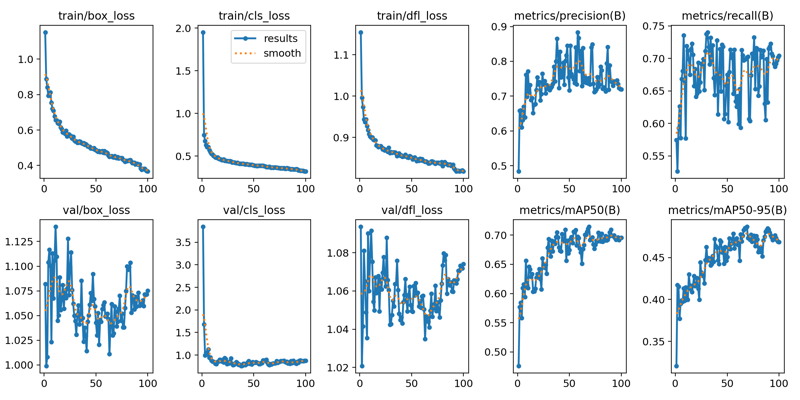

In [39]:
from ultralytics.utils.plotting import plot_results
from PIL import Image
from IPython.display import display

def show_plot(img_path, rw=3, rh=3):
    img = Image.open(img_path)

    # Уменьшаем размер, например, в 2 раза
    new_width = img.width // rw
    new_height = img.height // rh
    img_resized = img.resize((new_width, new_height))

    display(img_resized)

show_plot(r"runs\detect\train23\results.png")


* По функциям потерть на трейне видим, что модель еще могла бы улучшаться, на val выборке такие графики из-за разметки и количества изображений, на val выборке я почти ничего не чистил, итог очевиден. Если просто почистить от лишних полигонов и накинуть трек полигоны на основные объекты, то результат уже сильно лучше должен стать.

* Графики p и r метрик пилообразные из-за маленького датасета, каждый батч сильно влияет на результат, общий тренд прослеживается, но по графикам видно, что по метрикам почти вышли на предел. 

Посмотрим еще матрицу ошибок





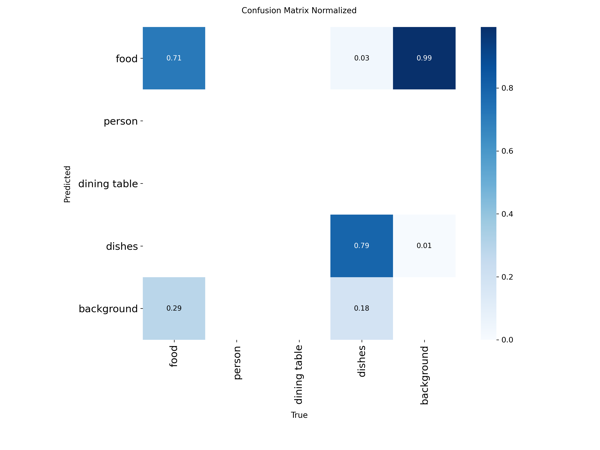

In [42]:
show_plot(r"runs\detect\train23\confusion_matrix_normalized.png", rw=5, rh=5)

Здесь видим конкретную проблему - еда путается с бекграундом, модель считает фоном почти всю еду, поэтому это выглядит как будто то, что модель считает едой - на самом деле фон. Это проблема разметки, на самом деле модель все правильно отличает. 

Так же видим 0.71 и 0.79 для наших классов, что для такого подхода очень даже хорошо

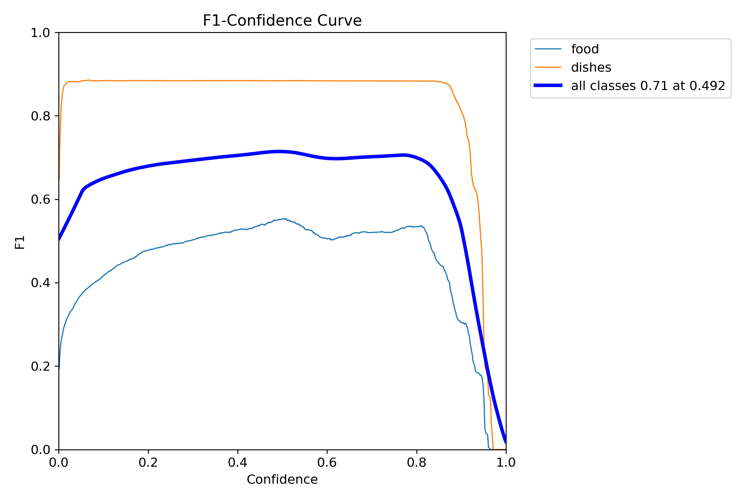

In [ ]:
show_plot(r"runs\detect\train23\F1_curve.png")

По f1 нам подходит conf 0.2-0.8

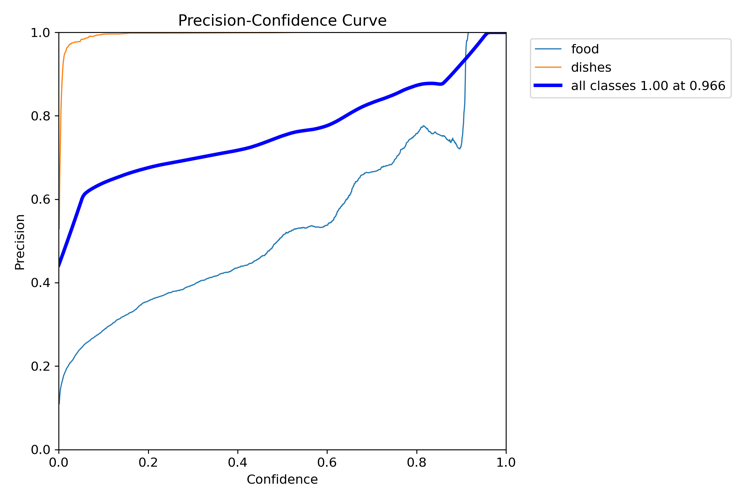

In [44]:
show_plot(r"runs\detect\train23\P_curve.png")

Не стабильная кривая - причина маленького датасета и ошибок в разметке

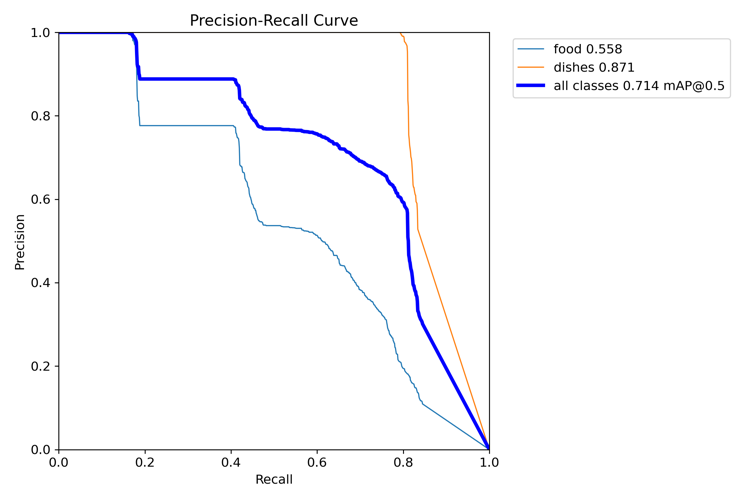

In [46]:
show_plot(r"runs\detect\train23\PR_curve.png")

По графику видно, что часть предсказаний не являются правдой, это опять же связано с шумом в виде большого количества лишних полигонов

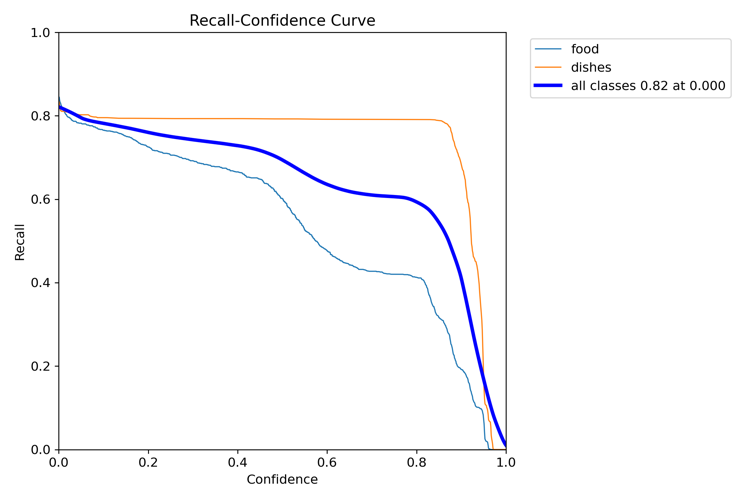

In [45]:
show_plot(r"runs\detect\train23\R_curve.png")

Такие кривые говорят о неоднородности данных, что и так понятно

# Вывод по графикам

Исходя из наших графиков мы можем ставить высокий conf в районе 0.7


# Посмотрим трекинг с нашей моделью на нашем тесте

In [9]:
from collections import defaultdict
import cv2
import numpy as np
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO(r"runs\detect\train23\weights\best.pt")

# Open the video file
video_path = r"dataset\test.MOV"
cap = cv2.VideoCapture(video_path)

screen_res = (1920, 1080)  

max_width, max_height = screen_res

# Store the track history
track_history = defaultdict(lambda: [])

def scale_frame(frame, max_width, max_height):
    height, width = frame.shape[:2]
    scale = min(max_width / width, max_height / height)
    new_width = int(width * scale)
    new_height = int(height * scale)
    return cv2.resize(frame, (new_width, new_height))

# Loop through the video frames
while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Run YOLO11 tracking on the frame, persisting tracks between frames
        result = model.track(frame,
                              persist=True,
                              conf=0.7,
                              iou=0.4,
                             )[0]

        # Get the boxes and track IDs
        if result.boxes and result.boxes.is_track:
            boxes = result.boxes.xywh.cpu()
            track_ids = result.boxes.id.int().cpu().tolist()

            # Visualize the result on the frame
            frame = result.plot()

            # Plot the tracks
            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                track = track_history[track_id]
                track.append((float(x), float(y)))  # x, y center point
                if len(track) > 30:  # retain 30 tracks for 30 frames
                    track.pop(0)

                # Draw the tracking lines
                points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
                cv2.polylines(frame, [points], isClosed=False, color=(230, 230, 230), thickness=10)


        frame_resized = scale_frame(frame, max_width, max_height)

        # Display the annotated frame
        cv2.imshow("YOLO11 Tracking", frame_resized)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 2 foods, 5 dishess, 11.0ms
Speed: 2.3ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 foods, 5 dishess, 21.5ms
Speed: 1.9ms preprocess, 21.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 foods, 4 dishess, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 foods, 4 dishess, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 food, 4 dishess, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 food, 4 dishess, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 foods, 4 dishess, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 foods, 4 dishess, 10.1ms
Speed: 1.7m

В целом приемлемо, видит еду как внутренность тарелки, а так же отдельные куски, по типу лаваша на тарелке. Пустую тарелку так и видит, почему то потерял чайник. При больших conf почему то полносью теряет кружки. В начале пытается даже поймать соус. 

# Итог по времени 

2 часа на препроцессинг (получение датасета, тесты моделей для авторазметки, нарезка видео, настройка авторазметки)
1:30 часа на разметку
30 минут на подготовку датасета и версионирование. 
~5 часов на тесты 

Итоговое затраченное время ~9 часов

Плюс где то полтора-два часа на оформление результатов. 